# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_train.shape)

(50000, 32, 32, 3)
4
uint8
(50000, 32, 32, 3)


In [ ]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


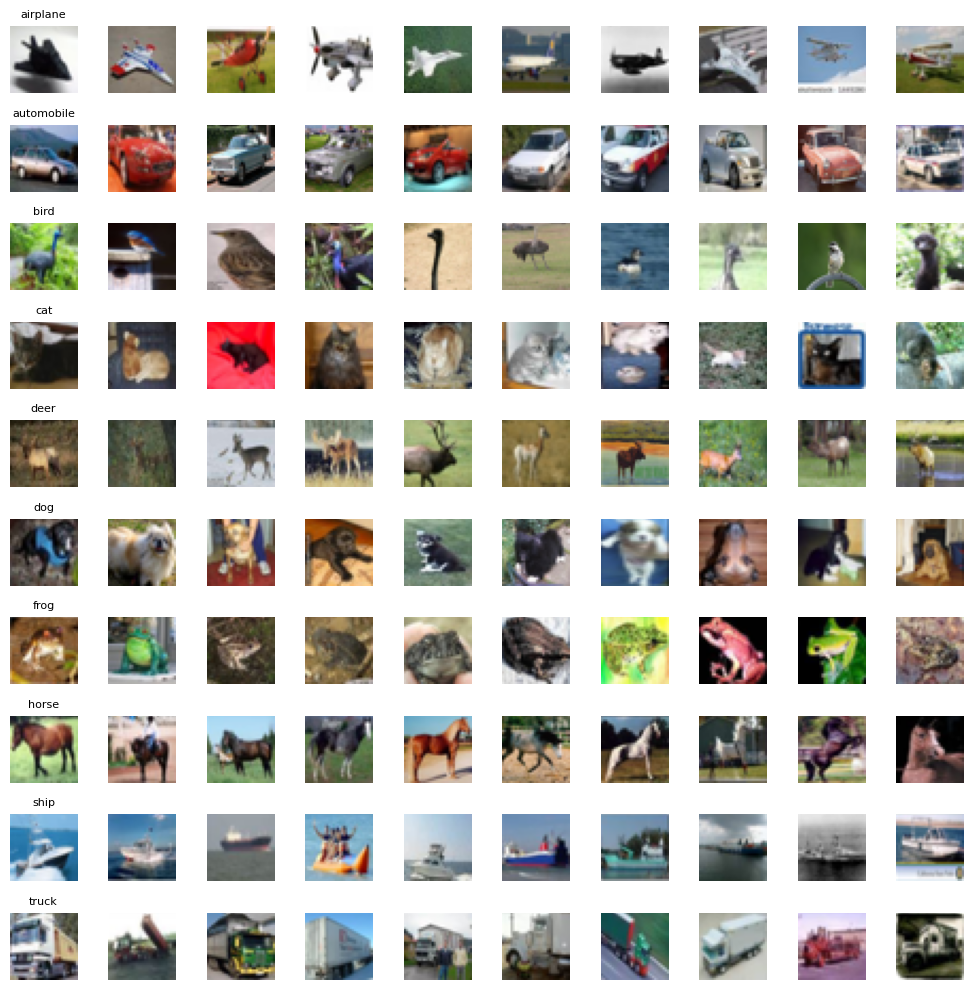

In [ ]:
# Visualize 10 random images from each class
plt.figure(figsize=(10, 10))
for class_idx in range(10):
    # Use argwhere to find indices where y_train has the current class label
    class_indices = np.argwhere(y_train[:, class_idx] == 1).flatten()
    # Get images of the class using the found indices
    class_images = x_train[class_indices]
    for i in range(10):  # Pick 10 random images
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(class_images[i])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx], fontsize=8)  # Add class name to first image

plt.tight_layout()
plt.show()



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten feature maps
    Dense(100, activation='relu'),  # Fully connected layer with 100 neurons
    Dense(10, activation='softmax')  # Output layer (softmax for classification)
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Compile the model using SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model for 50 epochs with batch size 512
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1459 - loss: 2.2789 - val_accuracy: 0.2330 - val_loss: 2.1818
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2479 - loss: 2.1467 - val_accuracy: 0.2859 - val_loss: 2.0477
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2841 - loss: 2.0295 - val_accuracy: 0.3114 - val_loss: 1.9713
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3101 - loss: 1.9570 - val_accuracy: 0.3351 - val_loss: 1.9127
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3361 - loss: 1.9081 - val_accuracy: 0.3410 - val_loss: 1.8794
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3529 - loss: 1.8604 - val_accuracy: 0.3588 - val_loss: 1.8377
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3574 - loss: 1.8402 - val_accuracy: 0.3622 - val_loss: 1.8142
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3730 - loss: 1.8035 - val_accuracy: 0.3813 - v

*   Plot the cross entropy loss curve and the accuracy curve

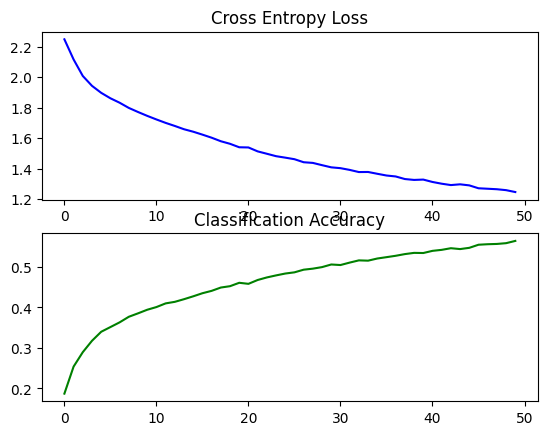

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.5407 - loss: 1.2875

Test accuracy: 0.5407


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Define the VGG-like model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer (softmax for classification)
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs with batch size of 512
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.1614 - loss: 2.2646 - val_accuracy: 0.2407 - val_loss: 2.1299
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2491 - loss: 2.0977 - val_accuracy: 0.2998 - val_loss: 1.9991
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2867 - loss: 2.0286 - val_accuracy: 0.3200 - val_loss: 1.9512
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3255 - loss: 1.9177 - val_accuracy: 0.3365 - val_loss: 1.8833
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3438 - loss: 1.8695 - val_accuracy: 0.3287 - val_loss: 1.8719
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3699 - loss: 1.8025 - val_accuracy: 0.3820 - val_loss: 1.7594
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3806 - loss: 1.7587 - val_accuracy: 0.3889 - val_loss: 1.7420
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3963 - loss: 1.7301 - val_accuracy: 0.3992 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


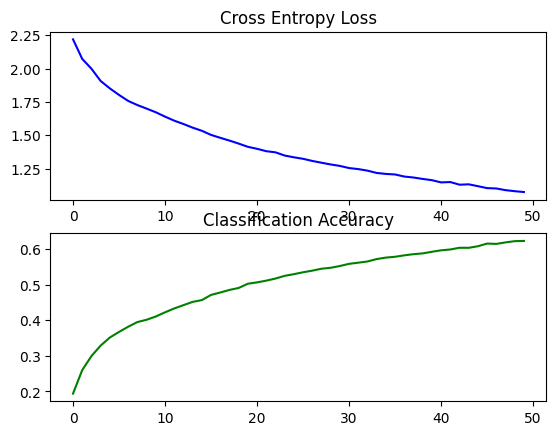

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.5552 - loss: 1.2544

Test accuracy: 0.5552


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


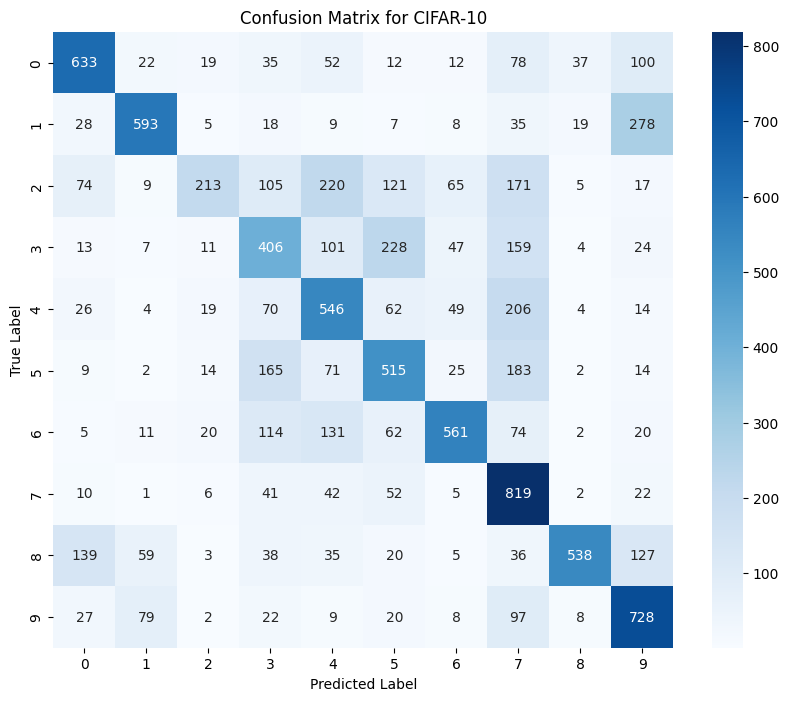

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64      1000
           1       0.75      0.59      0.66      1000
           2       0.68      0.21      0.32      1000
           3       0.40      0.41      0.40      1000
           4       0.45      0.55      0.49      1000
           5       0.47      0.52      0.49      1000
           6       0.71      0.56      0.63      1000
           7       0.44      0.82      0.57      1000
           8       0.87      0.54      0.66      1000
           9       0.54      0.73      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.60      0.56      0.55     10000
weighted avg       0.60      0.56      0.55     10000



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (probabilities) for the test set
y_pred_probs = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels back to integers

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Define the VGG-style model
model = Sequential([
    # First Conv Block (64 filters)
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block (128 filters)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Conv Block (256 filters)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np


# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images to 64x64
x_train_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64)) for img in x_test])

# Normalize the images to range [0, 1]
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the VGG-style model
model = Sequential([
    # First Conv Block (64 filters)
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block (128 filters)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Conv Block (256 filters)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs with batch size 512
history = model.fit(x_train_resized, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_resized, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 632ms/step - accuracy: 0.1223 - loss: 2.3007 - val_accuracy: 0.1649 - val_loss: 2.2944
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.1733 - loss: 2.2903 - val_accuracy: 0.2113 - val_loss: 2.2672
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.2079 - loss: 2.2393 - val_accuracy: 0.1642 - val_loss: 2.2385
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.2307 - loss: 2.1210 - val_accuracy: 0.2854 - val_loss: 2.0225
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.2909 - loss: 1.9876 - val_accuracy: 0.3340 - val_loss: 1.8873
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.3188 - loss: 1.9223 - val_accuracy: 0.3554 - val_loss: 1.8346
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.3389 - loss: 1.8601 - val_accuracy: 0.3477 - val_loss: 1.8254
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.3562 - loss: 1.8255 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


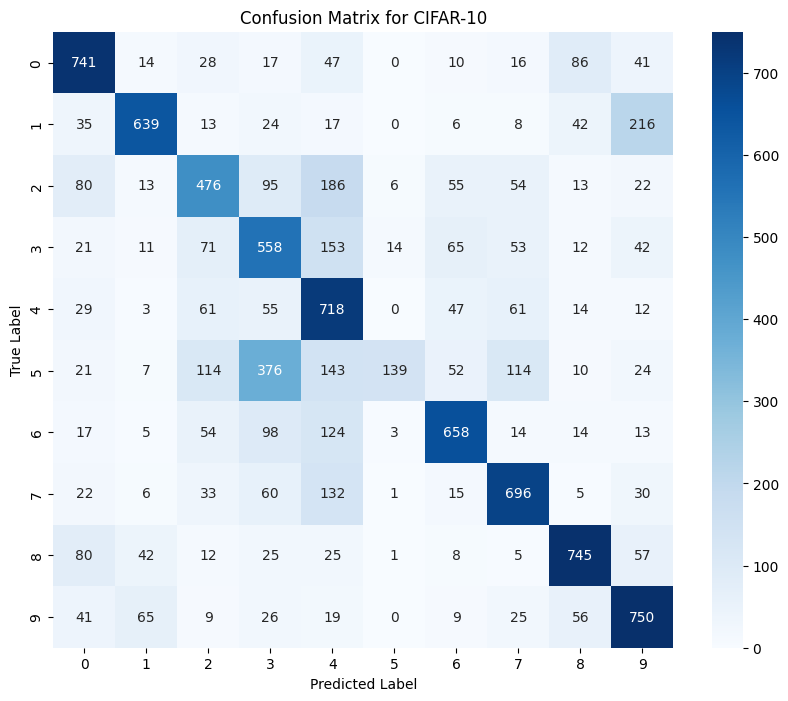

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.79      0.64      0.71      1000
           2       0.55      0.48      0.51      1000
           3       0.42      0.56      0.48      1000
           4       0.46      0.72      0.56      1000
           5       0.85      0.14      0.24      1000
           6       0.71      0.66      0.68      1000
           7       0.67      0.70      0.68      1000
           8       0.75      0.74      0.75      1000
           9       0.62      0.75      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.65      0.61      0.60     10000
weighted avg       0.65      0.61      0.60     10000



In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (probabilities) for the test set
y_pred_probs = model.predict(x_test_resized)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels back to integers

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

# Print classification report for precision, recall, and f1-score
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

[link text](https://)**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the neural network, allowing it to learn complex patterns in data. Without activation functions, a neural network would behave like a simple linear regression model, limiting its ability to solve real-world problems like image classification or speech recognition.

Why are activation functions needed?
They allow the network to learn complex relationships beyond linear transformations.
They help introduce non-linearity, making deep networks effective.
They prevent networks from collapsing into a single linear function.
They control the flow of gradients during backpropagation

_

2 - Key Differences between sigmoid and softmax:
Sigmoid is used for binary classification (output is one probability value between 0 and 1).
Example: Detecting if an image contains a cat (yes/no).
Softmax is used for multi-class classification (outputs probability for multiple classes).
Example: CIFAR-10 (where an image could belong to one of 10 classes).


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Both are loss functions used in classification tasks, but they are used in different cases.
Binary Crossentropy (BCE)
Used for binary classification (2 classes: 0 or 1).
Categorical Crossentropy (CCE)
Used for multi-class classification (more than 2 classes).


_
